<a href="https://colab.research.google.com/github/EduardoWS/Calculo-Numerico/blob/main/EduardoRibeiroRodrigues_13696679_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1  Sistemas Lineares com Matrizes Simétricas**

**1) Considere a matriz *A* e o vetor b dados abaixo**

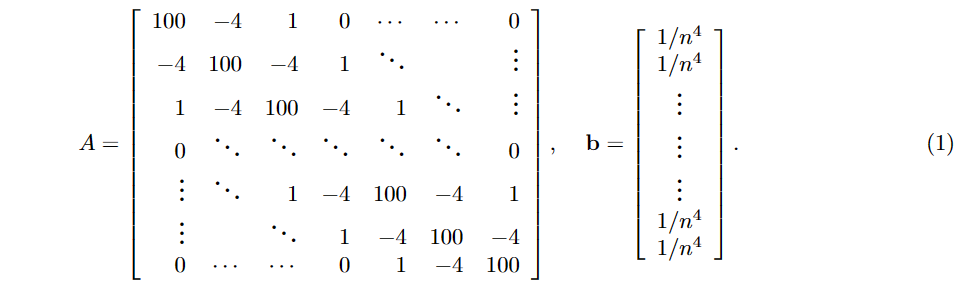

**Seja *n* a dimensão do problema.** 

a)  Escreva um código que monte a matriz *A* para *n* = 1000.

In [58]:
#imports
import numpy as np

#contantes
N = 1000              


In [27]:
def montar_matriz(N):
    A = np.eye(N) * 100

    # Atualiza os vizinhos da diagonal principal com o valor -4
    for i in range(N):
        if i > 0:
            A[i, i-1] = -4  # Vizinho à esquerda
        if i < N-1:
            A[i, i+1] = -4  # Vizinho à direita

    # Atualiza os vizinhos de -4 para 1
    for i in range(N):
        if i > 0:
            if A[i, i-1] == -4:
                if i-1 < 0 or i == 1:
                    pass
                else:
                    A[i, i-2] = 1  # Vizinho à esquerda
                
        if i < N-1:
            if A[i, i+1] == -4:
                if i+1 >= N-1:
                    pass
                else:
                    A[i, i+2] = 1  # Vizinho à direita
    return A


In [56]:
A = montar_matriz(10)

print("EXEMPLO COM N = 10:\n")
print(A)

EXEMPLO COM N = 10:

[[100.  -4.   1.   0.   0.   0.   0.   0.   0.   0.]
 [ -4. 100.  -4.   1.   0.   0.   0.   0.   0.   0.]
 [  1.  -4. 100.  -4.   1.   0.   0.   0.   0.   0.]
 [  0.   1.  -4. 100.  -4.   1.   0.   0.   0.   0.]
 [  0.   0.   1.  -4. 100.  -4.   1.   0.   0.   0.]
 [  0.   0.   0.   1.  -4. 100.  -4.   1.   0.   0.]
 [  0.   0.   0.   0.   1.  -4. 100.  -4.   1.   0.]
 [  0.   0.   0.   0.   0.   1.  -4. 100.  -4.   1.]
 [  0.   0.   0.   0.   0.   0.   1.  -4. 100.  -4.]
 [  0.   0.   0.   0.   0.   0.   0.   1.  -4. 100.]]


In [59]:
A = montar_matriz(N)

print("EXEMPLO COM N = 1000:\n")
print(A)

EXEMPLO COM N = 1000:

[[100.  -4.   1. ...   0.   0.   0.]
 [ -4. 100.  -4. ...   0.   0.   0.]
 [  1.  -4. 100. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 100.  -4.   1.]
 [  0.   0.   0. ...  -4. 100.  -4.]
 [  0.   0.   0. ...   1.  -4. 100.]]


<hr>

b) Escreva um código que faça a decomposição de Cholesky de uma matriz simétrica definida positiva qualquer.

In [47]:
# Exemplo de matriz A simétrica definida positiva
A = np.array([[9, 2, 1],
              [2, 5, 2],
              [1, 2, 6]])

# Vetor x
x = np.array([1, 2, 3])

# Vetor b
b = np.dot(A, x)

print("Matriz A:")
print(A)
print("\nVetor x:")
print(x)
print("\nVetor b:")
print(b)

Matriz A:
[[9 2 1]
 [2 5 2]
 [1 2 6]]

Vetor x:
[1 2 3]

Vetor b:
[16 18 23]


In [51]:
# EXEMPLO USANDO FUNÇÕES DO PYTHON
from scipy.linalg import cholesky, solve_triangular

A = np.array([[9, 2, 1],
              [2, 5, 2],
              [1, 2, 6]])

b = [16, 18, 23]

L = cholesky(A, lower=True)
y = solve_triangular(L, b, lower=True)
x = solve_triangular(L.T, y, lower=False)

print("A solução do sistema é:")
print(x)

A solução do sistema é:
[1. 2. 3.]


In [53]:
def cholesky_decomposition(A):
    """
    Realiza a decomposição de Cholesky de uma matriz simétrica definida positiva A.
    Retorna a matriz triangular inferior L.
    """
    n = A.shape[0]
    L = np.zeros_like(A, dtype=float)

    for i in range(n):
        for j in range(i + 1):
            if i == j:
                L[i, i] = np.sqrt(A[i, i] - np.dot(L[i, :i], L[i, :i]))
            else:
                L[i, j] = (A[i, j] - np.dot(L[i, :j], L[j, :j])) / L[j, j]

    return L

In [52]:
def solve_triangular_lower(L, b):
    """
    Resolve um sistema triangular inferior Ly = b, onde L é uma matriz triangular inferior e b é um vetor.
    Retorna o vetor y, que é a solução do sistema.
    """
    n = len(b)
    y = np.zeros(n)

    for i in range(n):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]

    return y

def solve_triangular_upper(U, b):
    """
    Resolve um sistema triangular superior Ux = b, onde U é uma matriz triangular superior e b é um vetor.
    Retorna o vetor x, que é a solução do sistema.
    """
    n = len(b)
    x = np.zeros(n)

    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]

    return x

In [54]:
# Mesmo exemplo sem utilizar funções prontas:
A = np.array([[9, 2, 1],
              [2, 5, 2],
              [1, 2, 6]])

b = [16, 18, 23]


# Calculando a decomposição de Cholesky da matriz A:
H = cholesky_decomposition(A)

# Resolvendo o sistema triangular inferior Hy = b:
y = solve_triangular_lower(H, b)

# Resolvendo o sistema triangular superior H^T x = y:
x = solve_triangular_upper(H.T, y)

print("A solução do sistema é:")
print(x)

A solução do sistema é:
[1. 2. 3.]


<hr>

c)  Usando as rotinas implementadas anteriormente, escreva um código para resolver um sistema Ax=b

In [66]:
# Exemplo para n = 10:
n = 10

A = montar_matriz(n)
b = np.ones(n)/n**(4)

print(A)
print()
print(b)

[[100.  -4.   1.   0.   0.   0.   0.   0.   0.   0.]
 [ -4. 100.  -4.   1.   0.   0.   0.   0.   0.   0.]
 [  1.  -4. 100.  -4.   1.   0.   0.   0.   0.   0.]
 [  0.   1.  -4. 100.  -4.   1.   0.   0.   0.   0.]
 [  0.   0.   1.  -4. 100.  -4.   1.   0.   0.   0.]
 [  0.   0.   0.   1.  -4. 100.  -4.   1.   0.   0.]
 [  0.   0.   0.   0.   1.  -4. 100.  -4.   1.   0.]
 [  0.   0.   0.   0.   0.   1.  -4. 100.  -4.   1.]
 [  0.   0.   0.   0.   0.   0.   1.  -4. 100.  -4.]
 [  0.   0.   0.   0.   0.   0.   0.   1.  -4. 100.]]

[0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]


In [65]:
# Calculando a decomposição de Cholesky da matriz A:
H = cholesky_decomposition(A)

# Resolvendo o sistema triangular inferior Hy = b:
y = solve_triangular_lower(H, b)

# Resolvendo o sistema triangular superior H^T x = y:
x = solve_triangular_upper(H.T, y)

print("A solução do sistema é:")
print(x)

A solução do sistema é:
[1.03228419e-06 1.07323449e-06 1.06451885e-06 1.06376302e-06
 1.06382052e-06 1.06382052e-06 1.06376302e-06 1.06451885e-06
 1.07323449e-06 1.03228419e-06]


In [67]:
# Para n = 1000
A = montar_matriz(N)
b = np.ones(N)/N**(4)

# Calculando a decomposição de Cholesky da matriz A:
H = cholesky_decomposition(A)

# Resolvendo o sistema triangular inferior Hy = b:
y = solve_triangular_lower(H, b)

# Resolvendo o sistema triangular superior H^T x = y:
x = solve_triangular_upper(H.T, y)

print("A solução do sistema é:")
print(x)

A solução do sistema é:
[1.03228419e-14 1.07323449e-14 1.06451885e-14 1.06376292e-14
 1.06382023e-14 1.06383008e-14 1.06382989e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14
 1.06382979e-14 1.06382979e-14 1.06382979e-14 1.06382979e-14


<hr>

d)  Escreva um código implementando o método de Jacobi para resolver um sistema Ax=b.  Utilize o erro absoluto como critério de parada.

In [ ]:
def jacobi(A, b, max_itr=100, tol=1e-6):
    """
    Resolve um sistema linear Ax = b utilizando o método de Jacobi.
    Retorna o vetor x, que é a solução do sistema.
    """
    n = len(b)
    x = np.zeros(n)
    x_prev = np.zeros(n)
    iterations = 0

    while iterations < max_itr:
        for i in range(n):
            x[i] = (b[i] - np.dot(A[i, :i], x_prev[:i]) - np.dot(A[i, i+1:], x_prev[i+1:])) / A[i, i]

        error = np.linalg.norm(x - x_prev, ord=np.inf)
        if error < tol:
            break

        x_prev = x.copy()
        iterations += 1

    return x